<a href="https://colab.research.google.com/github/Aakash-FMML20210811/FMML-Colab-Projects/blob/main/FMML20210811_Module%207%20lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Arpan Dasgupta

arpan.dasgupta@research.iiit.ac.in

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

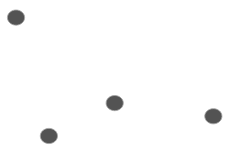

We can assign each of these points to a separate cluster:

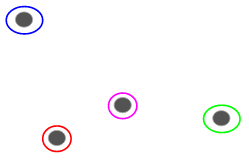

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

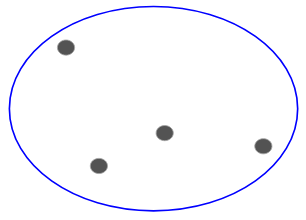

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

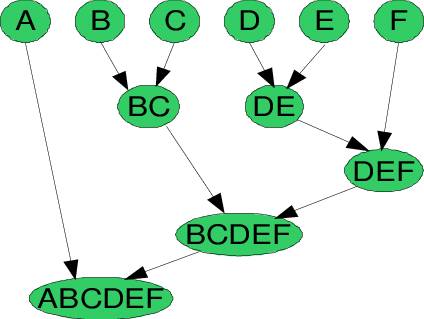

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

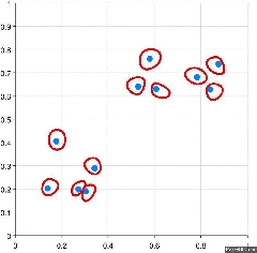

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

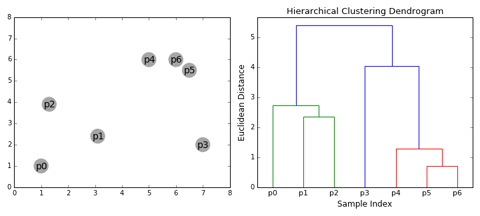



Note:- 

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters. 

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

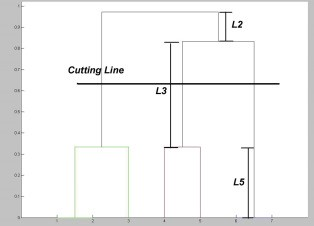

In [1]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   5012      0 --:--:-- --:--:-- --:--:--  5012
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0  30042      0 --:--:-- --:--:-- --:--:-- 30042


### Agglomerative Clustering on Mall Visitors Database

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's load the dataset

In [3]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [4]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Try to learn a relationships between predictors.

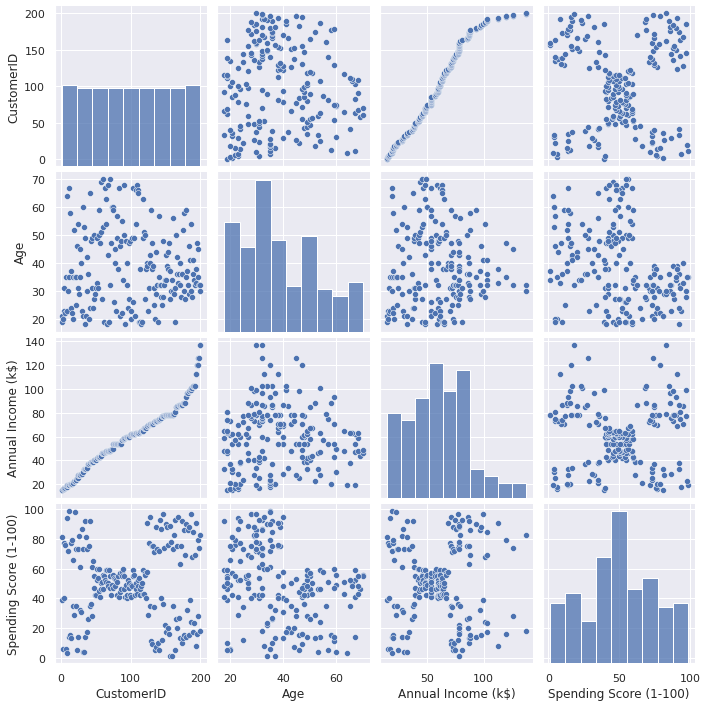

In [5]:
import seaborn as sns
sns.set(style='darkgrid')
sns.pairplot(dataset,diag_kind='hist')

In [8]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

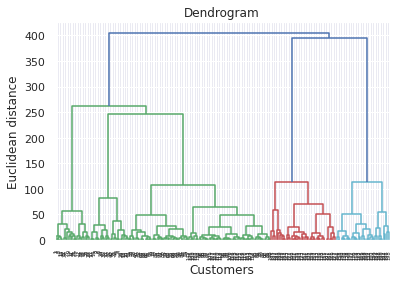

In [9]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualize the results.

In [22]:
# Labelling Customers
dct={0:'Careful',1:'Standard',2:'Target',3:'Careless',4:'Sensible'}
y_hc_label=[]
for ele in y_hc:
  y_hc_label.append(dct[ele])

Text(0, 0.5, 'Spending Score (1-100)')

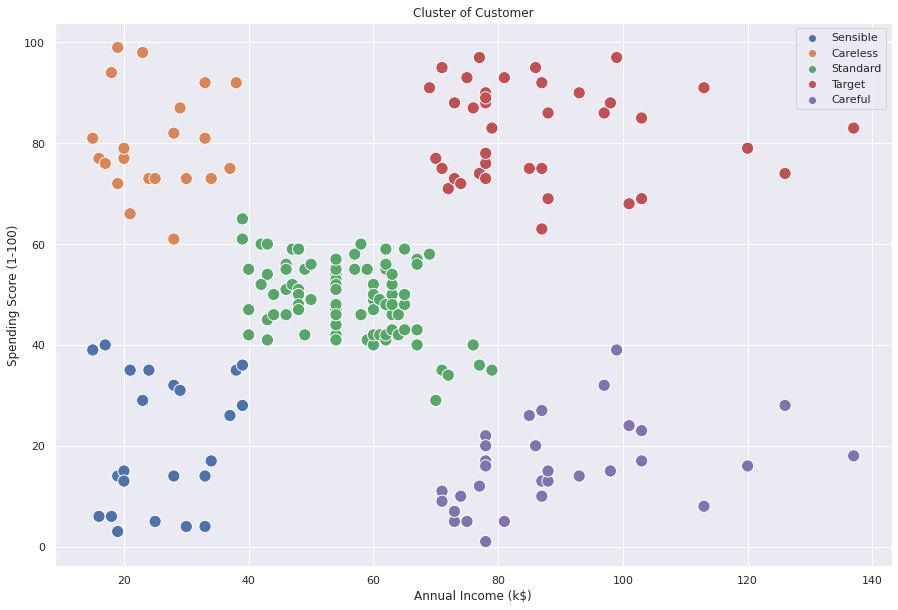

In [26]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,1,1)
ax1=sns.scatterplot(data='None',x=X[:,0],y=X[:,1],hue=y_hc_label,palette="deep",s=150)
ax1.set_title("Cluster of Customer")
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages - 

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



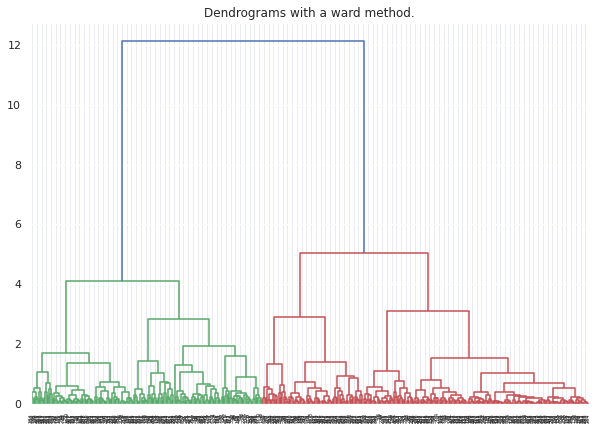

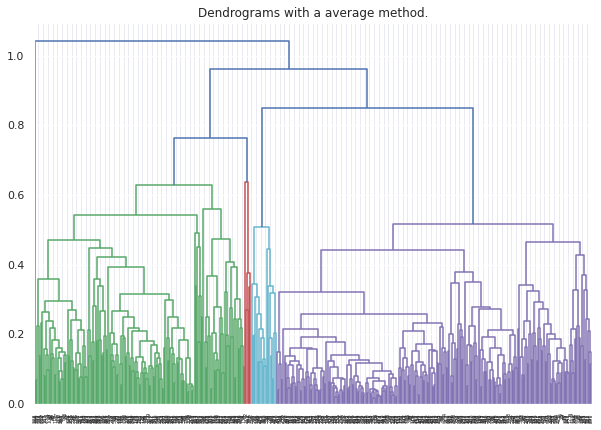

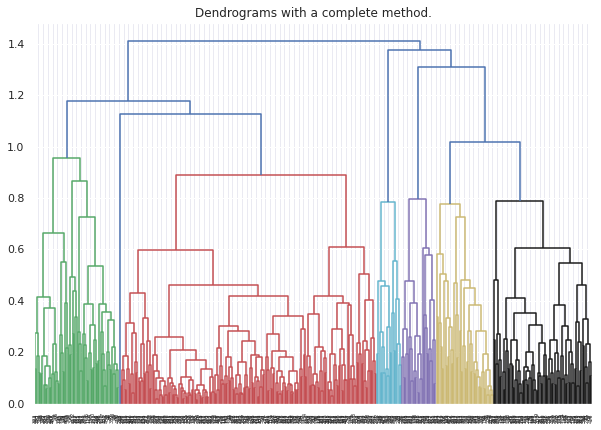

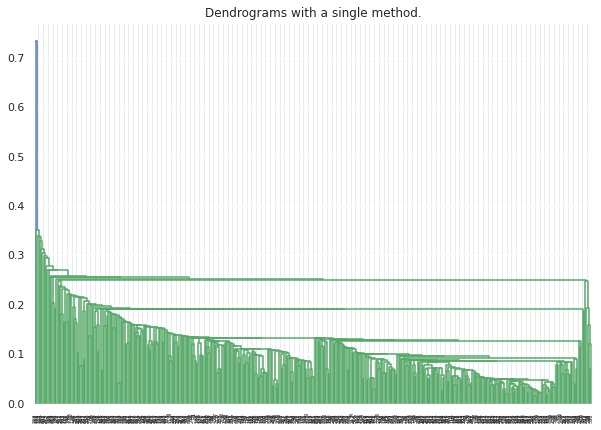

In [33]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms with a "+linkage+" method.")  
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

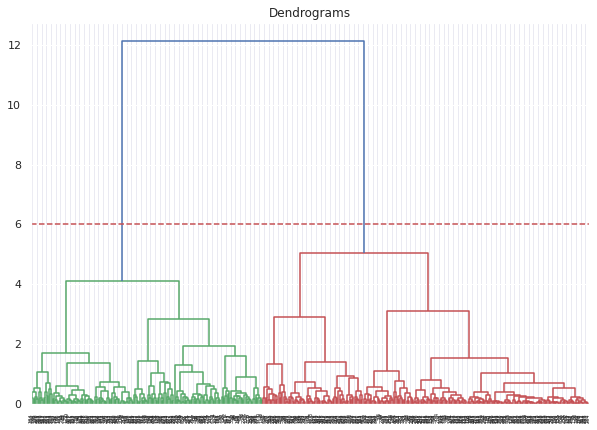

In [34]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

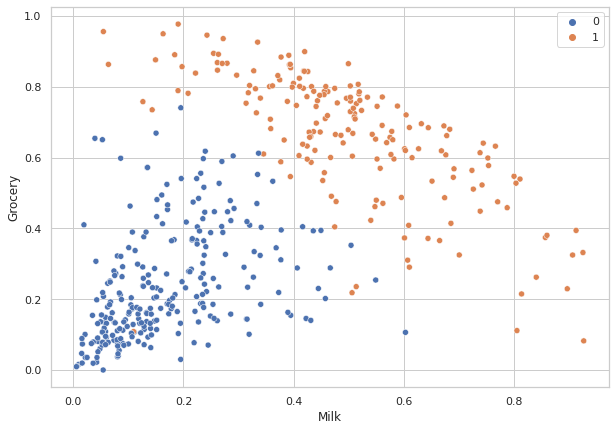

In [41]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid") 
sns.scatterplot(x=data_scaled['Milk'], y=data_scaled['Grocery'], hue=cluster.labels_) 

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

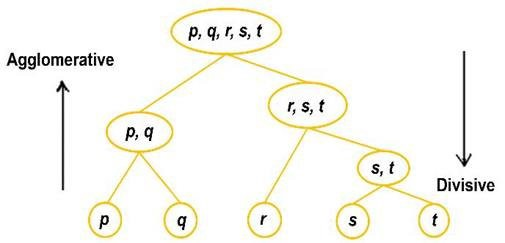

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Excercises

1. What is the need for hierarchical clustering and its advantages over KMeans?
2. What is the advantages of Density Based Clustering over KMeans?

Ans-1

---

Hierarchical Clustering is a unsupervised algorithms which treats each datapoints as seperate clusters then merge them recursively on basis of proximity matrix untill they converge to single cluster having large blob of datapoints. Unlike K-means we do not need to assign value of K i.e number of clusters before algortihms start. People's often can't know optimal value of K to be used, to solve this problem hierarchical clustering arrives which show tree based merging of cluster at different intervals.

Advatages over K-means:

*   Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informaHve	than	
the	unstructured	set	of	flat	clusters	returned	by	k-means.	Therefore,	it	is	easier	to	decide	
on	the	number	of	clusters	by	looking	at	the	dendrogram.
*   Easy	to	implement	

Ans-2

---



1.   Clusters formed are arbitrary in shape and may not have same feature size.
2.   DBScan clustering efficiently handles outliers and noisy datasets.









## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec 
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html